# Importing important Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
train_df = pd.read_csv('train.csv')

# Glance of dataset

In [3]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
print(train_df.shape)
train_df.describe()

(614, 13)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Replacing null values with Mean/Median/Mode (accordingly)

In [7]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())

In [8]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0],inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0],inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0],inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0],inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0],inplace=True)

train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [9]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Plotting graph of different columns w.r.t. Loan status(for checking behaviour of the individual columns)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

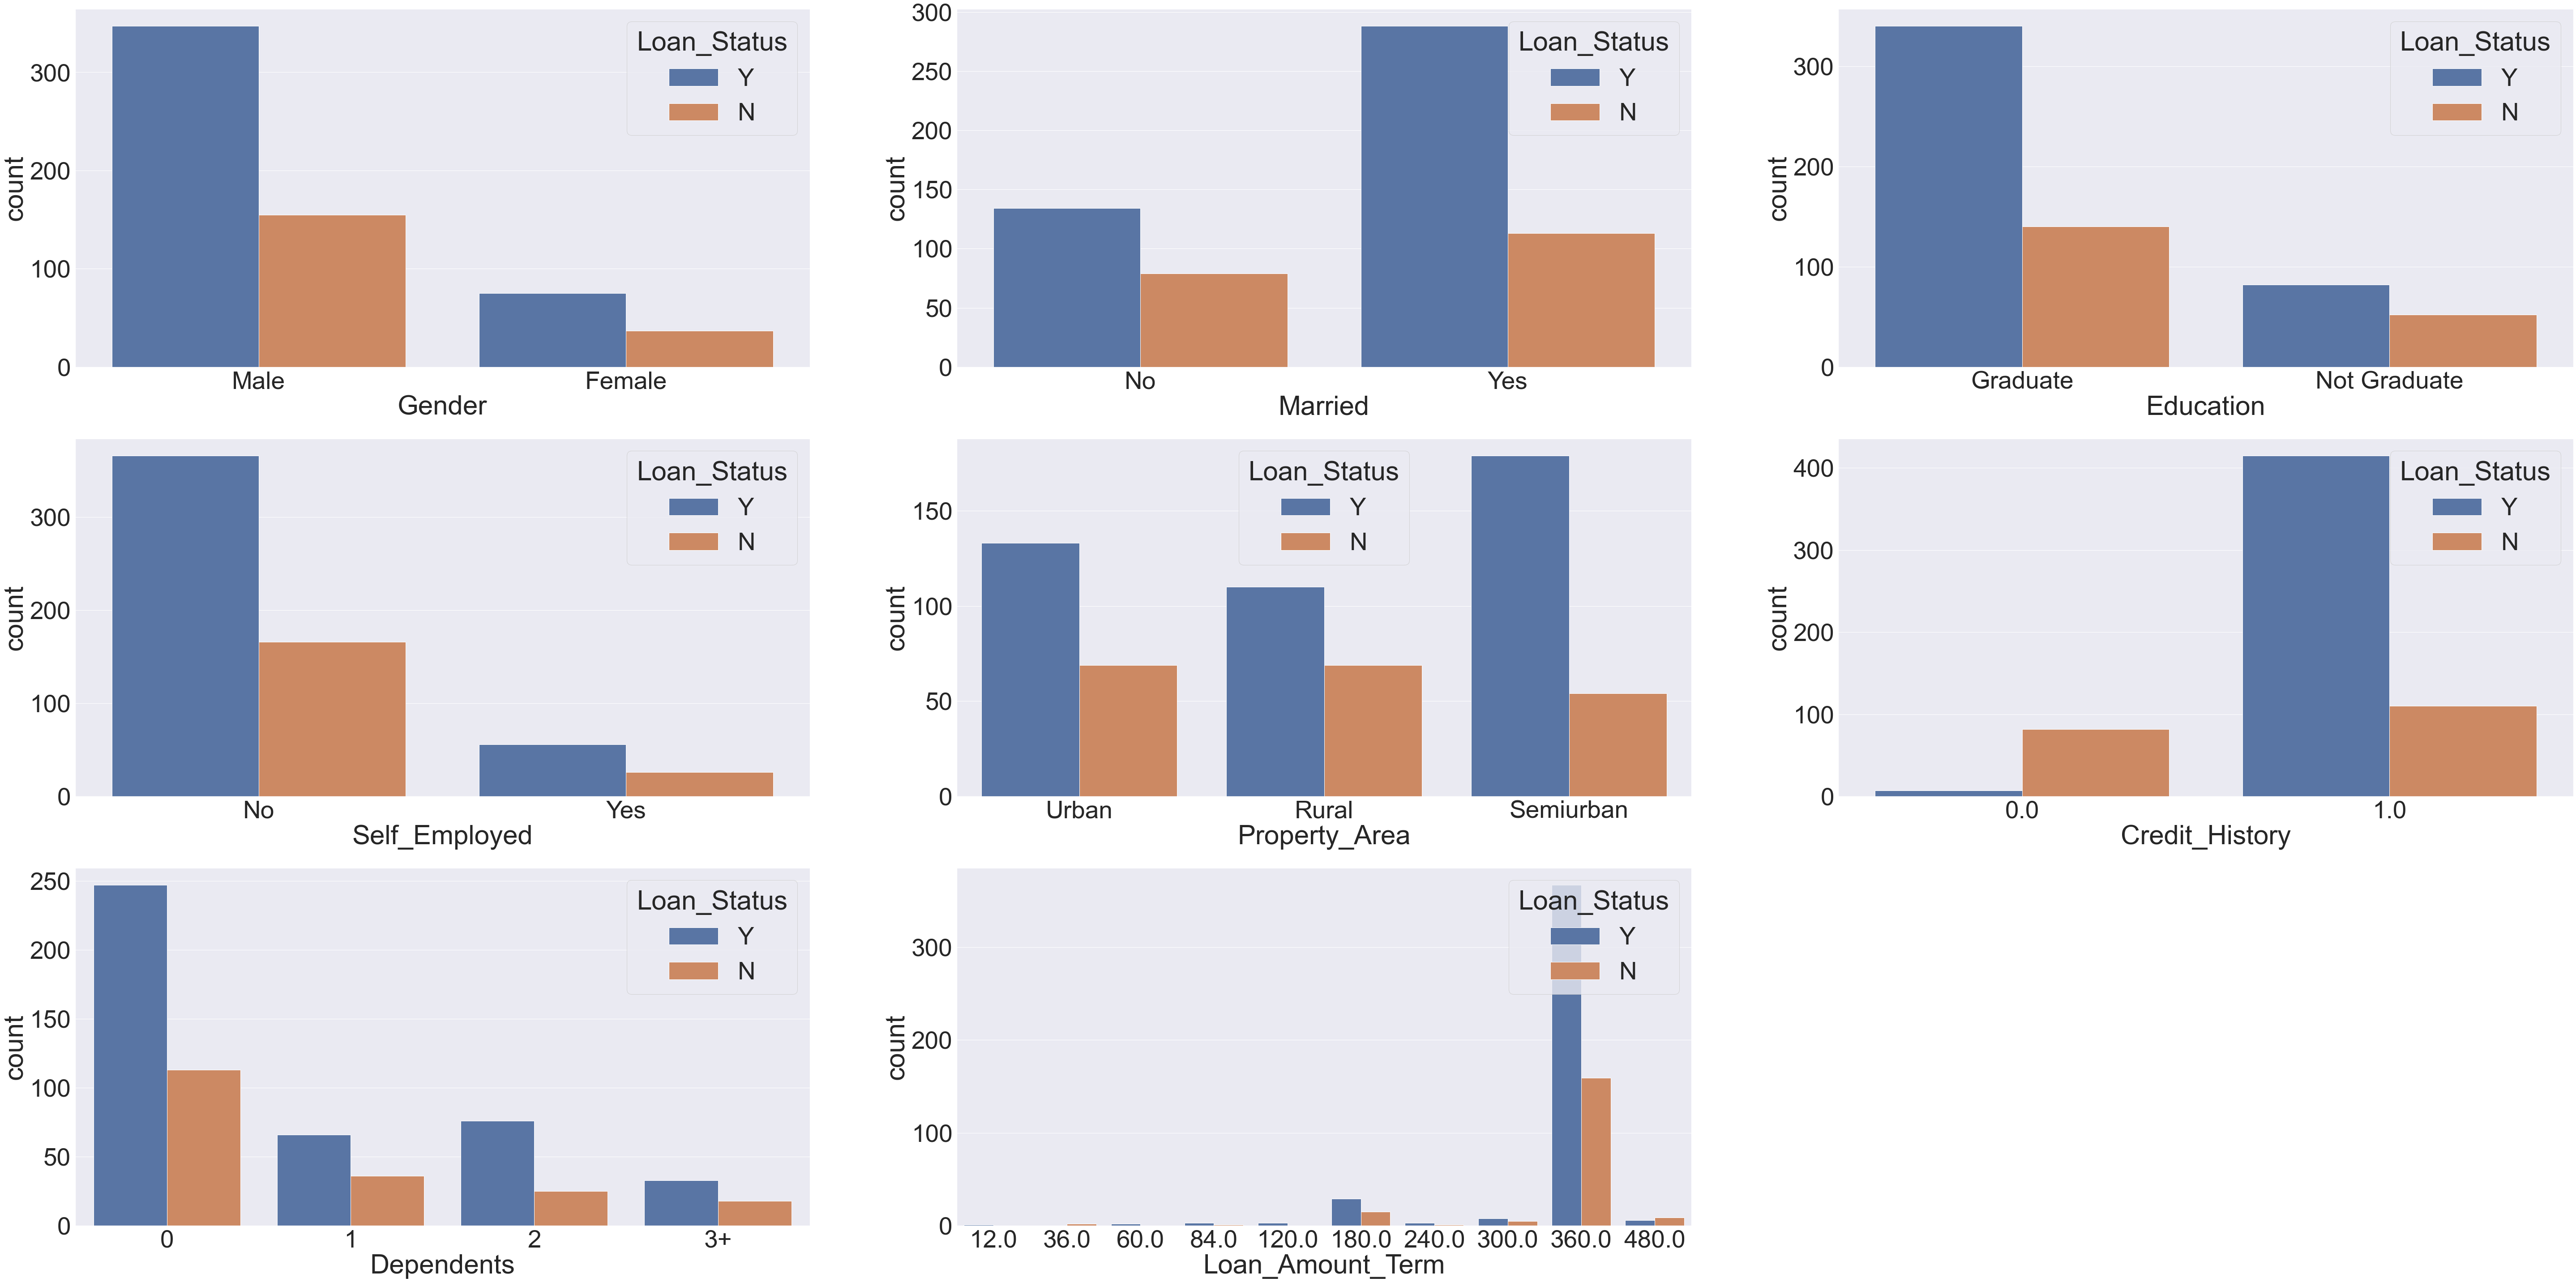

In [10]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(train_df['Gender'],hue=train_df['Loan_Status'])

plt.subplot(332)
sns.countplot(train_df['Married'],hue=train_df['Loan_Status'])

plt.subplot(333)
sns.countplot(train_df['Education'],hue=train_df['Loan_Status'])

plt.subplot(334)
sns.countplot(train_df['Self_Employed'],hue=train_df['Loan_Status'])

plt.subplot(335)
sns.countplot(train_df['Property_Area'],hue=train_df['Loan_Status'])

plt.subplot(336)
sns.countplot(train_df['Credit_History'],hue=train_df['Loan_Status'])

plt.subplot(337)
sns.countplot(train_df['Dependents'],hue=train_df['Loan_Status'])

plt.subplot(338)
sns.countplot(train_df['Loan_Amount_Term'],hue=train_df['Loan_Status'])

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Replacing the Categorical values (especially object type columns) with numerical values for better computation

In [12]:
train_df['Loan_Status'].replace("Y",1,inplace=True)
train_df['Loan_Status'].replace("N",0,inplace=True)
train_df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [13]:
train_df.Gender = train_df.Gender.map({'Male' : 1,'Female':0})
train_df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [14]:
train_df.Married = train_df.Married.map({'Yes' : 1,'No':0})
train_df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [15]:
train_df.Dependents = train_df.Dependents.map({'0' : 0,'1':1,'2':2,'3+':3})
train_df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [16]:
train_df.Education = train_df.Education.map({'Graduate' : 1,'Not Graduate':0})
train_df['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [17]:
train_df.Self_Employed = train_df.Self_Employed.map({'Yes' : 1,'No':0})
train_df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [18]:
train_df.Property_Area = train_df.Property_Area.map({'Urban' : 2,'Rural':0,'Semiurban':1})
train_df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [20]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


#  Dropping the column with no use

In [21]:
train_df = train_df.drop('Loan_ID',axis=1)

# Putting independent columns to (X) and adding dependent column (i.e; Loan_Status)to (y)

In [22]:
X =train_df.drop('Loan_Status',1)
y = train_df.Loan_Status

# Importing libraries for training and computing the model with different algorithms

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

# Splitting the data for training and testing the model

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

# Logistic Regression

In [36]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
print("Accuracy",metrics.accuracy_score(lr_pred,y_test)*100)

Accuracy 83.24324324324324


[[ 22  29]
 [  2 132]]


Text(476.5, 0.5, 'True')

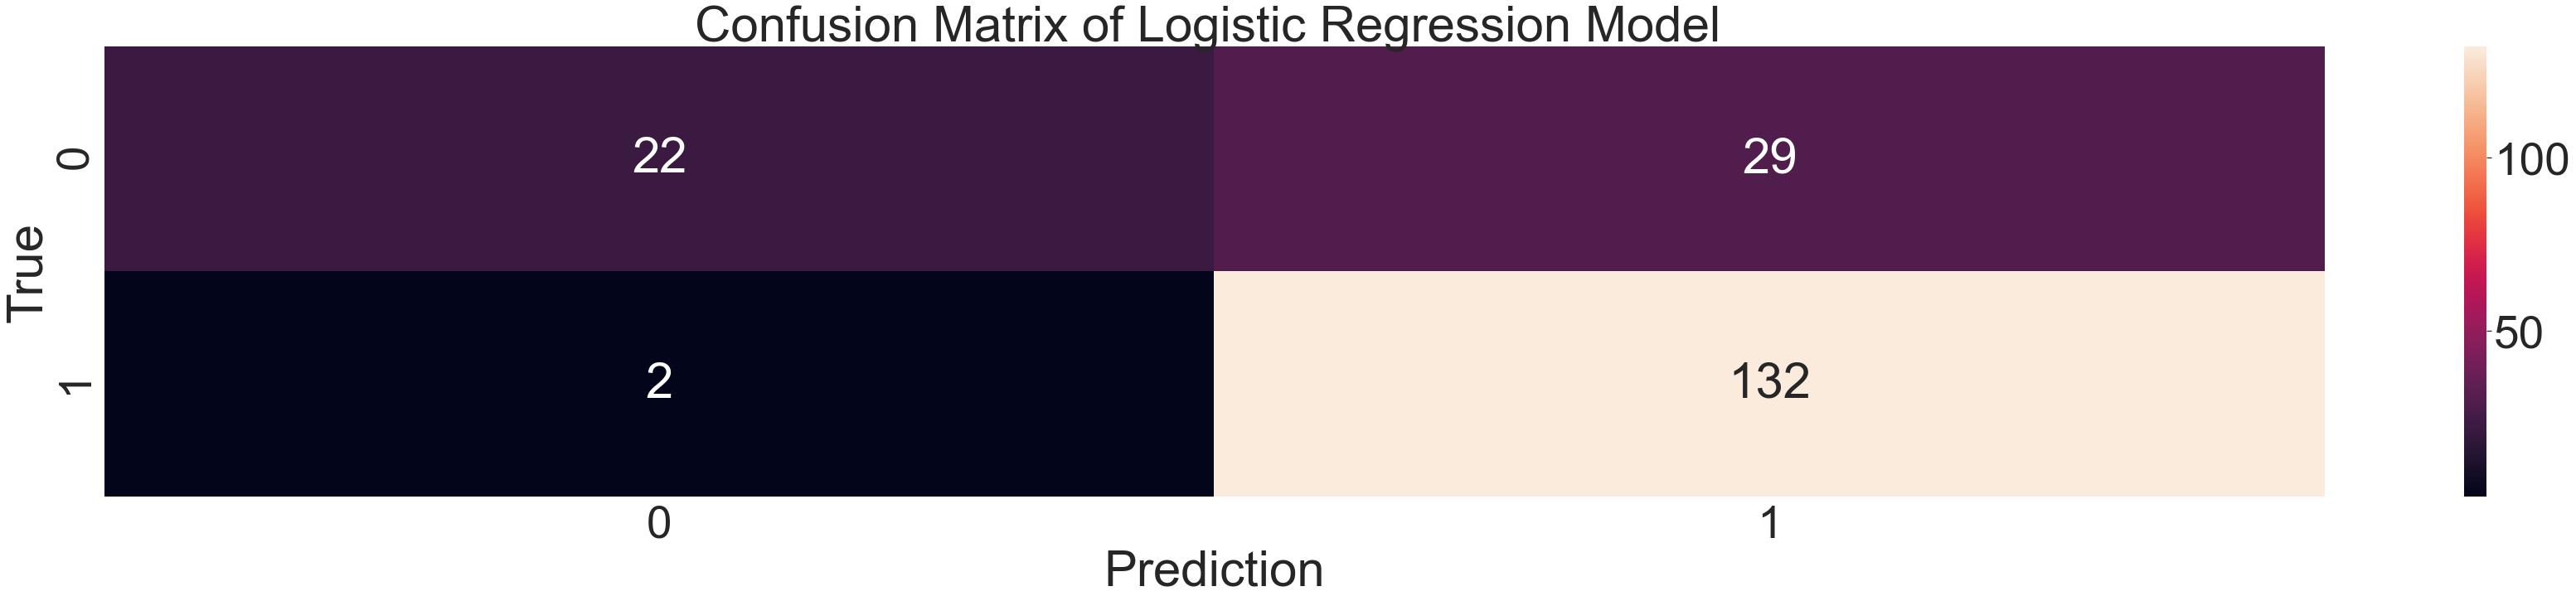

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_pred)
print(cm)
plt.figure(figsize=(60,10))
sns.heatmap(cm,annot = True, fmt='d')
plt.title("Confusion Matrix of Logistic Regression Model ")
plt.xlabel("Prediction")
plt.ylabel("True")

# Decision Tree Classifier

In [38]:
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred=dt_model.predict(X_test)

cm = confusion_matrix(y_test,dt_pred)
print(cm)
print(metrics.accuracy_score(y_test,dt_pred)*100)

[[ 28  23]
 [ 24 110]]
74.5945945945946


Text(476.5, 0.5, 'True')

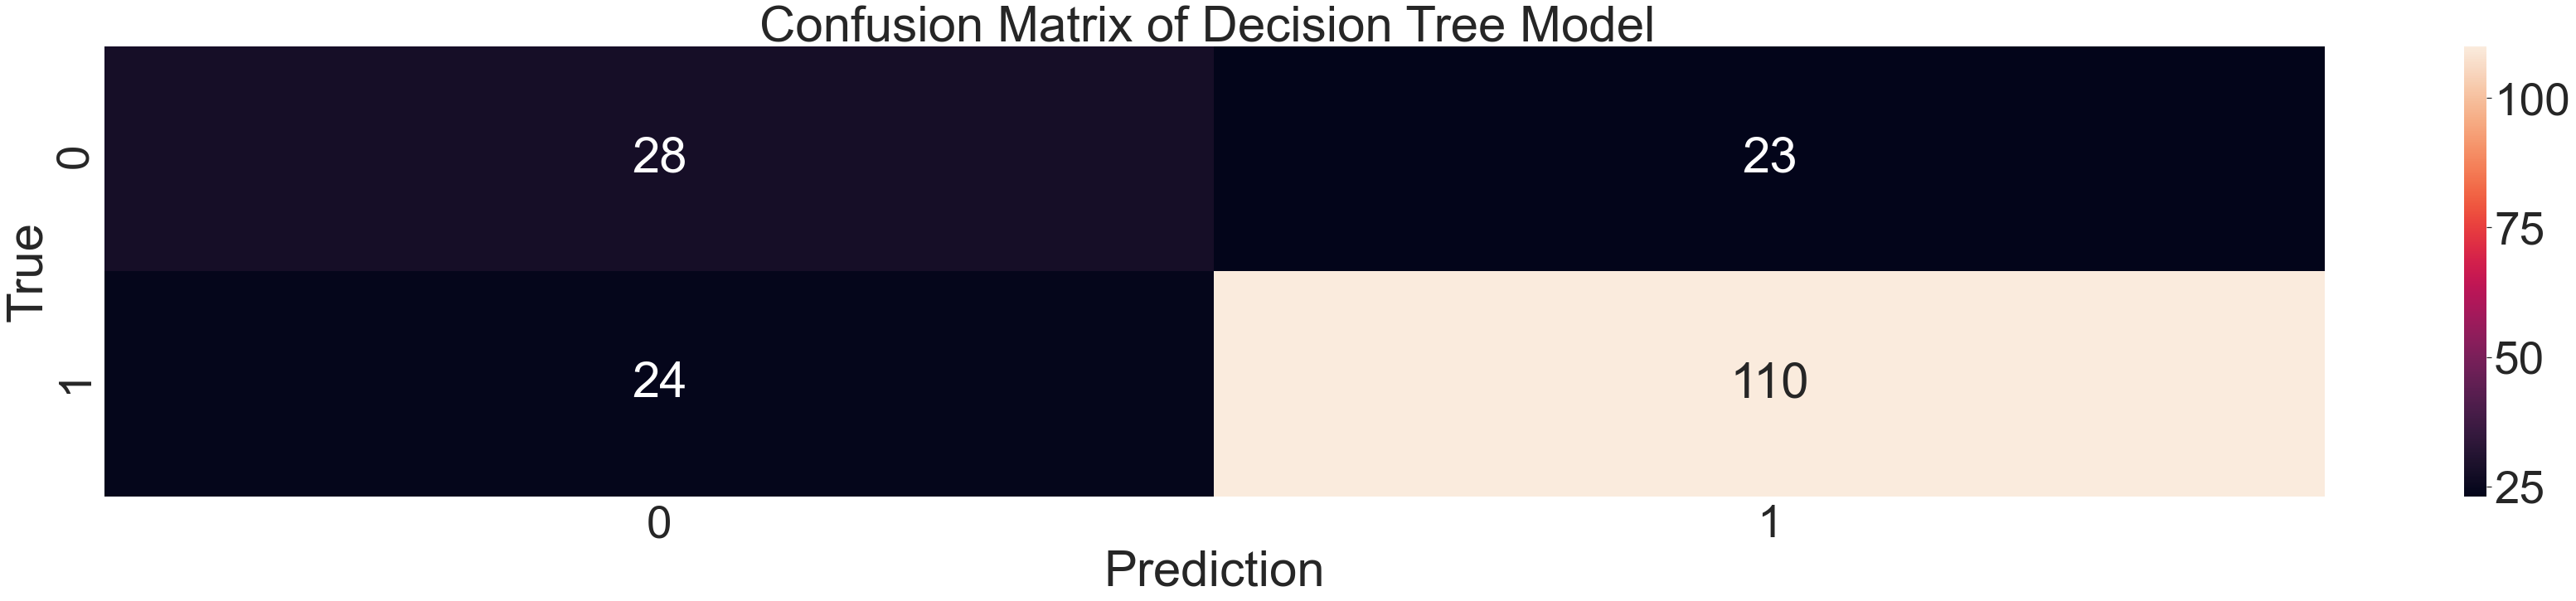

In [39]:
plt.figure(figsize=(60,10))
sns.heatmap(cm,annot = True, fmt='d')
plt.title("Confusion Matrix of Decision Tree Model ")
plt.xlabel("Prediction")
plt.ylabel("True")

# Random Forest

In [40]:
rf_model= RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)

cm = confusion_matrix(y_test,rf_pred)
print(cm)
print(metrics.accuracy_score(y_test,rf_pred)*100)

[[ 22  29]
 [  9 125]]
79.45945945945945


Text(476.5, 0.5, 'True')

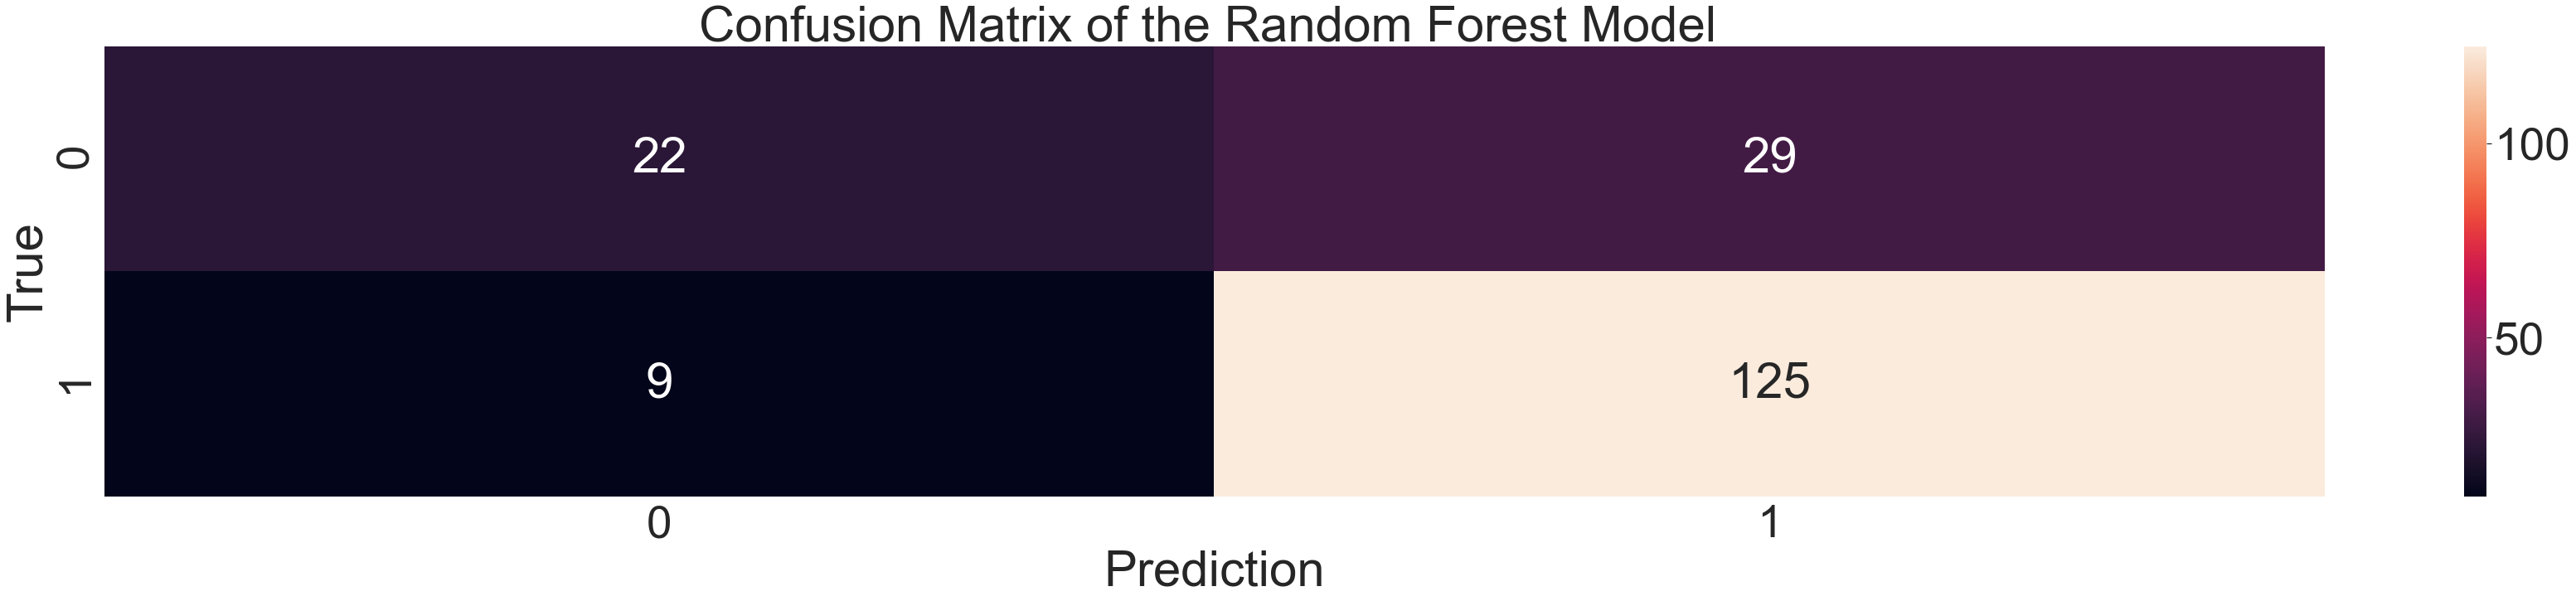

In [41]:
plt.figure(figsize=(60,10))
sns.heatmap(cm,annot = True, fmt='d')
plt.title("Confusion Matrix of the Random Forest Model ")
plt.xlabel("Prediction")
plt.ylabel("True")

# SVM 

In [42]:

svm_model= svm.SVC()
svm_model.fit(X_train,y_train)
svm_pred=svm_model.predict(X_test)

cm = confusion_matrix(y_test,svm_pred)
print(cm)
print(metrics.accuracy_score(y_test,svm_pred)*100)

[[  0  51]
 [  0 134]]
72.43243243243244


Text(476.5, 0.5, 'True')

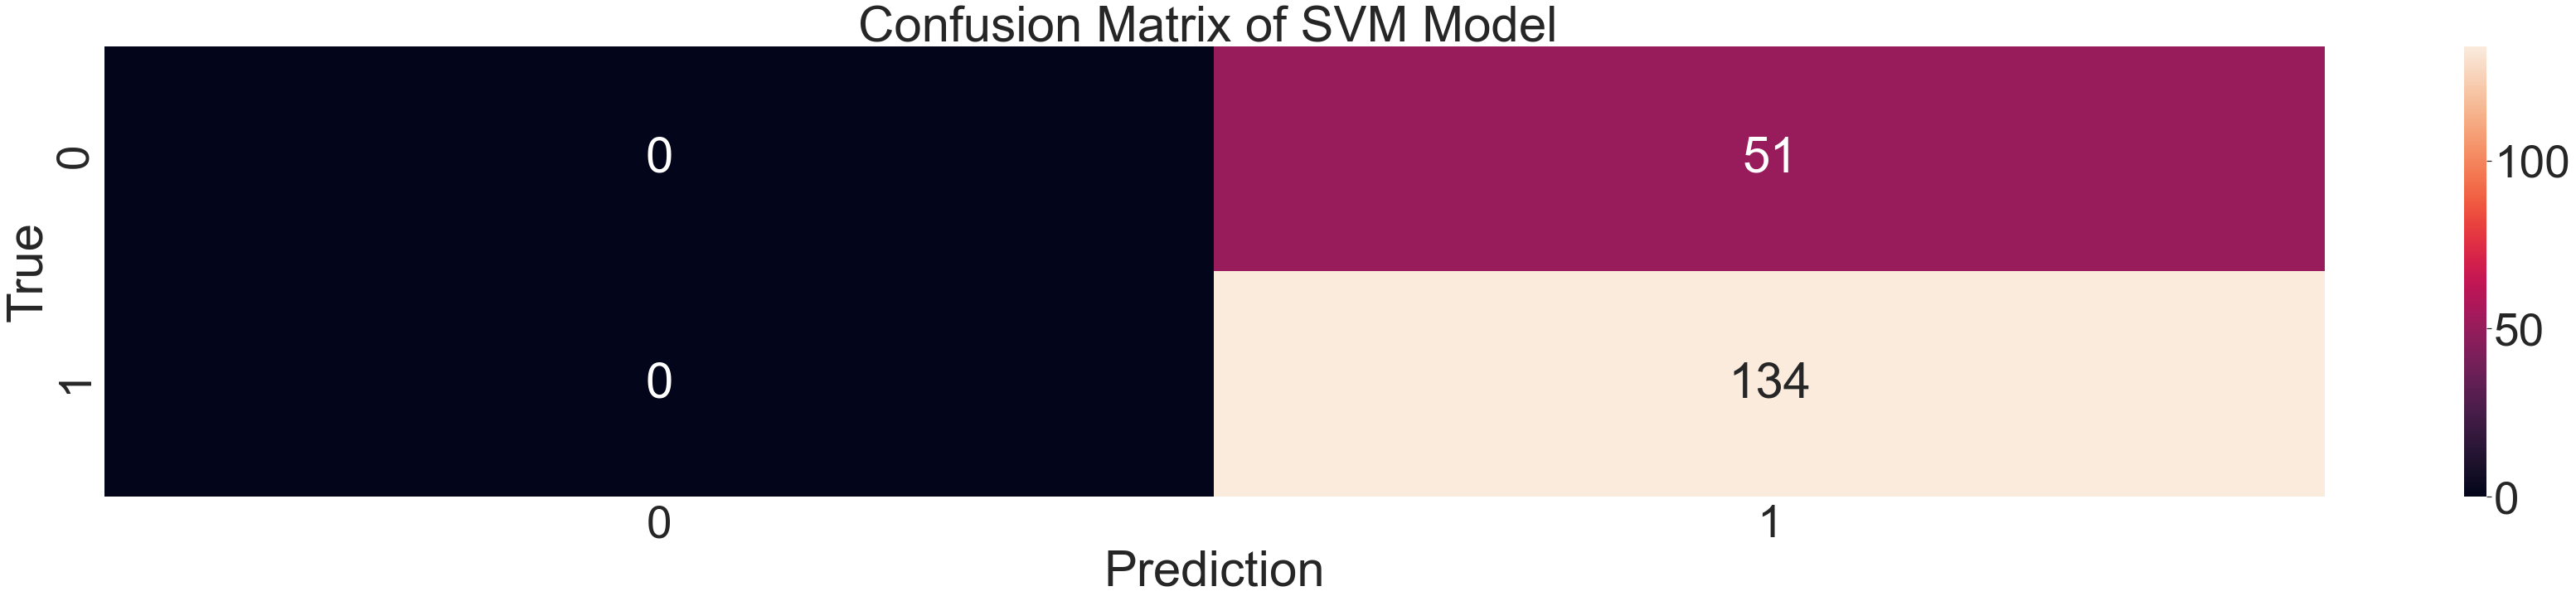

In [43]:
plt.figure(figsize=(60,10))
sns.heatmap(cm,annot = True, fmt='d')
plt.title("Confusion Matrix of SVM Model ")
plt.xlabel("Prediction")
plt.ylabel("True")

# Importing Pickle library and pickling the Logistic Regression model for further efficient computation/prediction in the API

In [44]:
import pickle

In [45]:
 pickle.dump(lr_model,open("Loan_pred",'wb'))